<a href="https://colab.research.google.com/github/LokeRuiKee/timeseries-forecasting-HuggingFace/blob/main/HFTransformer_uciElectricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install libraries & packages

# About Dataset


*   datasets = a Hugging Face library for creating and managing datasets.
*   pandas =  a common library for data manipulation and analysis.

In [ ]:
# install libraries

!pip install datasets
!pip install pandas

## 2. load dataset

In [ ]:
from datasets import load_dataset
import pandas as pd

# this line is included to solve an error due to version difference
pd.DataFrame.iteritems = pd.DataFrame.items

# git clone = 'download' the folder
!git clone https://huggingface.co/datasets/electricity_load_diagrams

# run the python script that's responsible for loading the dataset (by local)
dataset = load_dataset('/content/electricity_load_diagrams/electricity_load_diagrams.py', name='uci', trust_remote_code=True)

Generating train split:   0%|          | 0/370 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2590 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/370 [00:00<?, ? examples/s]

In [ ]:
# another way to load (by remote)
# rolling_evaluation = number of splits for evaluation. higher value = more thorough

# this line is included to solve an error due to version difference
pd.DataFrame.iteritems = pd.DataFrame.items

dataset = load_dataset("electricity_load_diagrams", "uci")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:929: FutureWarning: The repository for electricity_load_diagrams contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at electricity_load_diagrams/electricity_load_diagrams.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
# Check if the Dataset Loads Correctly

print(dataset['train'][0])  # Check the first item in the train split

{'start': datetime.datetime(2012, 1, 1, 0, 0), 'target': [12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.497461318969727, 15.228425979614258, 12.69035530090332, 12.69035530090332, 40.60913848876953, 68.52791595458984, 64.72080993652344, 65.9898452758789, 92.63959503173828, 63.451778411865234, 85.02538299560547, 64.72080993652344, 90.10152435302734, 49.49238586425781, 48.223350524902344, 15.228425979614258, 26.64974594116211, 59.64466857910156, 16.497461318969727, 54.56852722167969, 16.49746

## 3. **Explore** Dataset

### Train Set

In [ ]:

print(dataset)

# Access a specific split
train_dataset = dataset['train']

# View the first example
print(train_dataset[0])

# Convert to pandas DataFrame for more analysis

train_df = pd.DataFrame(train_dataset)
print(train_df.head())

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})
{'start': datetime.datetime(2012, 1, 1, 0, 0), 'target': [12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.49746131896

### Validation set

In [ ]:
print(dataset)

# Access a specific split
validation_dataset = dataset['validation']

# View the first example
print(validation_dataset[0])

# Convert to pandas DataFrame for more analysis

validation_df = pd.DataFrame(validation_dataset)
print(validation_df.head())

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})
{'start': datetime.datetime(2012, 1, 1, 0, 0), 'target': [12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.49746131896

### Test set

In [ ]:
print(dataset)

# Access a specific split
test_dataset = dataset['test']

# View the first example
print(test_dataset[0])

# Convert to pandas DataFrame for more analysis
test_df = pd.DataFrame(test_dataset)
print(test_df.head())

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})
{'start': datetime.datetime(2012, 1, 1, 0, 0), 'target': [12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.49746131896

In [ ]:
print(dataset)

# Access a specific split
train_dataset = dataset['train']

# View the first example
print(train_dataset[0])

# Convert to pandas DataFrame for more analysis
test_df = pd.DataFrame(train_dataset)
print(test_df.head())

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})
{'start': Period('2012-01', 'M'), 'target': [12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.497461318969727, 15.2284

In [ ]:
# Using len()
total_rows = len(test_df)
print(f"Total rows: {total_rows}")

# Using shape
total_rows = test_df.shape[0]
print(f"Total rows: {total_rows}")

Total rows: 370
Total rows: 370


In [ ]:
print(dataset)

# Access a specific split
validate_dataset = dataset['validation']

# View the first example
print(validate_dataset[0])

# Convert to pandas DataFrame for more analysis
test_df = pd.DataFrame(validate_dataset)
print(test_df.head())

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})
{'start': datetime.datetime(2012, 1, 1, 0, 0), 'target': [12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.49746131896

### more exploration

In [ ]:
train_example0 = dataset['train'][0]
train_example0.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'item_id'])

In [ ]:
print(train_example0['start'])
print(train_example0['target'])
print(train_example0['feat_static_cat'])
print(train_example0['item_id'])

2012-01-01 00:00:00
[12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.497461318969727, 15.228425979614258, 12.69035530090332, 12.69035530090332, 40.60913848876953, 68.52791595458984, 64.72080993652344, 65.9898452758789, 92.63959503173828, 63.451778411865234, 85.02538299560547, 64.72080993652344, 90.10152435302734, 49.49238586425781, 48.223350524902344, 15.228425979614258, 26.64974594116211, 59.64466857910156, 16.497461318969727, 54.56852722167969, 16.497461318969727, 16.497461318969727, 15.22

In [ ]:
train_example1 = dataset['train'][1]
train_example1.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'item_id'])

In [ ]:
print(train_example1['start'])
print(train_example1['target'])
print(train_example1['feat_static_cat'])
print(train_example1['item_id'])

2012-01-01 00:00:00
[68.27880859375, 90.3271713256836, 93.88335418701172, 88.90469360351562, 87.48221588134766, 88.1934585571289, 87.48221588134766, 89.61592864990234, 87.48221588134766, 93.172119140625, 110.2418212890625, 140.82504272460938, 156.47225952148438, 145.80369567871094, 118.77667236328125, 110.2418212890625, 105.97439575195312, 105.2631607055664, 104.55191802978516, 104.55191802978516, 110.95305633544922, 110.2418212890625, 102.41820526123047, 96.72830963134766, 92.46088409423828, 88.90469360351562, 86.05974578857422, 85.34850311279297, 86.77098083496094, 87.48221588134766, 90.3271713256836, 106.68563079833984, 114.50924682617188, 113.79801177978516, 123.04409790039062, 123.04409790039062, 123.04409790039062, 117.35419464111328, 118.77667236328125, 115.2204818725586, 107.3968734741211, 103.84068298339844, 111.66429901123047, 125.88904571533203, 133.71266174316406, 117.35419464111328, 105.97439575195312, 97.43954467773438, 93.172119140625, 87.48221588134766, 85.3485031127929

In [ ]:
validation_example0 = dataset['validation'][0]
validation_example0.keys()

print(validation_example0['start'])
print(validation_example0['target'])
print(validation_example0['feat_static_cat'])
print(validation_example0['item_id'])

2012-01-01 00:00:00
[12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.497461318969727, 15.228425979614258, 12.69035530090332, 12.69035530090332, 40.60913848876953, 68.52791595458984, 64.72080993652344, 65.9898452758789, 92.63959503173828, 63.451778411865234, 85.02538299560547, 64.72080993652344, 90.10152435302734, 49.49238586425781, 48.223350524902344, 15.228425979614258, 26.64974594116211, 59.64466857910156, 16.497461318969727, 54.56852722167969, 16.497461318969727, 16.497461318969727, 15.22

## 4. Visualize Data

In [ ]:
freq = "1M"
prediction_length = 24

assert len(train_example0["target"]) + prediction_length == len(
    validation_example0["target"]
)

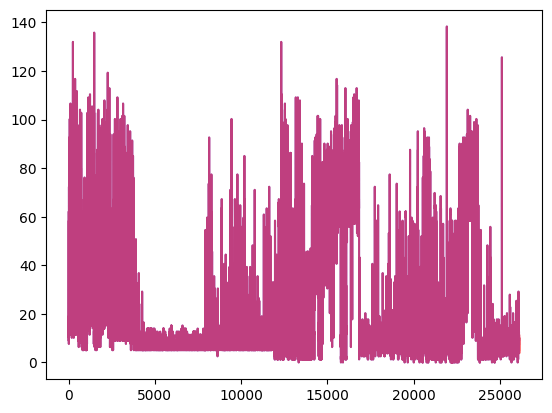

In [ ]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
axes.plot(train_example0["target"], color="blue")
axes.plot(validation_example0["target"], color="red", alpha=0.5)

plt.show()

# Forecast with Transformer

## 5. Train the Model

### Testing with the Transformer code from blog

Reference https://huggingface.co/blog/time-series-transformers

Update start to pd.Period

In [ ]:
from functools import lru_cache

import pandas as pd
import numpy as np


def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)

def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch

In [ ]:
from functools import partial

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))


In [ ]:
!pip install -q evaluate

!pip install -q accelerate

!pip install -q gluonts ujson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 5.6 MB/s eta 0:00:00


### define model

In [ ]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)


[1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 23, 24, 25, 35, 36, 37]


In [ ]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)
print(time_features)

[<function month_of_year at 0x7b540eb33ac0>]


In [ ]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

config = TimeSeriesTransformerConfig(
    prediction_length=prediction_length,
    # context length:
    context_length=prediction_length * 2,
    # lags coming from helper given the freq:
    lags_sequence=lags_sequence,
    # we'll add 2 time features ("month of year" and "age", see further):
    num_time_features=len(time_features) + 1,
    # we have a single static categorical feature, namely time series ID:
    num_static_categorical_features=1,
    # it has 366 possible values:
    cardinality=[len(train_dataset)],
    # the model will learn an embedding of size 2 for each of the 366 possible values:
    embedding_dimension=[2],

    # transformer params:
    encoder_layers=4,
    decoder_layers=4,
    d_model=32,
)

model = TimeSeriesTransformerForPrediction(config)


In [ ]:
model.config.distribution_output

'student_t'

### Define Transformations

In [ ]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency,
)
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)


In [ ]:
from transformers import PretrainedConfig

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    # a bit like torchvision.transforms.Compose
    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: convert the data to NumPy (potentially not needed)
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                # we expect an extra dim for the multivariate case:
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: add temporal features based on freq of the dataset
            # month of year in the case when freq="M"
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: add another temporal feature (just a single number)
            # tells the model where in its life the value of the time series is,
            # sort of a running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: vertically stack all the temporal features into the key FEAT_TIME
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )


### Define InstanceSplitter

In [ ]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional

def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )


### create dataloaders

In [ ]:
from typing import Iterable

import torch
from gluonts.itertools import Cached, Cyclic
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(stream)

    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )


In [ ]:
def create_backtest_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data)

    # we create a Validation Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "validation")

    # we apply the transformations in train mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=True)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [ ]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # We create a test Instance splitter to sample the very last
    # context window from the dataset provided.
    instance_sampler = create_instance_splitter(config, "test")

    # We apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [ ]:
train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=train_dataset,
    batch_size=256,
    num_batches_per_epoch=100,
)

test_dataloader = create_backtest_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=64,
)


In [ ]:
# check the first batch

batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, v.shape, v.type())

past_time_features torch.Size([256, 85, 2]) torch.FloatTensor
past_values torch.Size([256, 85]) torch.FloatTensor
past_observed_mask torch.Size([256, 85]) torch.FloatTensor
future_time_features torch.Size([256, 24, 2]) torch.FloatTensor
static_categorical_features torch.Size([256, 1]) torch.LongTensor
future_values torch.Size([256, 24]) torch.FloatTensor
future_observed_mask torch.Size([256, 24]) torch.FloatTensor


In [ ]:
## forward pass
# perform forward pass
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)

In [ ]:
print("Loss:", outputs.loss.item())

Loss: 7.529858112335205


### train the model

In [ ]:
from accelerate import Accelerator
from torch.optim import AdamW

accelerator = Accelerator()
device = accelerator.device

model.to(device)
optimizer = AdamW(model.parameters(), lr=6e-4, betas=(0.9, 0.95), weight_decay=1e-1)

model, optimizer, train_dataloader = accelerator.prepare(
    model,
    optimizer,
    train_dataloader,
)

model.train()
for epoch in range(40):
    for idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(
            static_categorical_features=batch["static_categorical_features"].to(device)
            if config.num_static_categorical_features > 0
            else None,
            static_real_features=batch["static_real_features"].to(device)
            if config.num_static_real_features > 0
            else None,
            past_time_features=batch["past_time_features"].to(device),
            past_values=batch["past_values"].to(device),
            future_time_features=batch["future_time_features"].to(device),
            future_values=batch["future_values"].to(device),
            past_observed_mask=batch["past_observed_mask"].to(device),
            future_observed_mask=batch["future_observed_mask"].to(device),
        )
        loss = outputs.loss

        # Backpropagation
        accelerator.backward(loss)
        optimizer.step()

        if idx % 100 == 0:
            print(loss.item())


8.034955978393555
6.890111923217773
6.4565277099609375
5.755849838256836
5.88041353225708
5.711636066436768
6.161880016326904
5.681703567504883
5.540651798248291
5.740938663482666
5.664646625518799
5.496182918548584
5.45640754699707
5.620771884918213
5.232528209686279
6.37457275390625
5.555852890014648
5.734661102294922
5.51383638381958
5.691056728363037
5.627161502838135
5.829674243927002
5.047264099121094
5.358253479003906
5.266342639923096
5.3297858238220215
5.153887748718262
5.494349956512451
5.2814788818359375
5.272946357727051
5.6788458824157715
5.453718662261963
5.1388258934021
5.388856410980225
5.576364994049072
5.123344898223877
5.850306034088135
5.691247940063477
5.678962707519531
5.221333980560303


### Inference

In [ ]:
model.eval()

forecasts = []

for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device)
        if config.num_static_categorical_features > 0
        else None,
        static_real_features=batch["static_real_features"].to(device)
        if config.num_static_real_features > 0
        else None,
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts.append(outputs.sequences.cpu().numpy())

In [ ]:
forecasts[0].shape

(64, 100, 24)

In [ ]:
forecasts = np.vstack(forecasts)
print(forecasts.shape)

(2590, 100, 24)


### evaluate

In [ ]:
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

forecast_median = np.median(forecasts, 1)

mase_metrics = []
smape_metrics = []
for item_id, ts in enumerate(test_dataset):
    training_data = ts["target"][:-prediction_length]
    ground_truth = ts["target"][-prediction_length:]
    mase = mase_metric.compute(
        predictions=forecast_median[item_id],
        references=np.array(ground_truth),
        training=np.array(training_data),
        periodicity=get_seasonality(freq))
    mase_metrics.append(mase["mase"])

    smape = smape_metric.compute(
        predictions=forecast_median[item_id],
        references=np.array(ground_truth),
    )
    smape_metrics.append(smape["smape"])


In [ ]:
print(f"MASE: {np.mean(mase_metrics)}")

MASE: 0.443906440918536


^MASE compares the performance of your model to that of a naive forecast (such as a simple seasonal naive forecast).
- A MASE value of 1 indicates that your model performs as well as the naive forecast.
- Values less than 1 indicate that your model outperforms the naive forecast, with lower values suggesting better performance.
- Values greater than 1 indicate that your model performs worse than the naive forecast.
- However, the interpretation of MASE depends on the specific forecasting problem and the characteristics of your data.

In [ ]:
print(f"sMAPE: {np.mean(smape_metrics)}")

sMAPE: 0.2703488760518764


^sMAPE measures the percentage difference between the predicted and actual values, taking into account the scale of the data.
- Like other error metrics, lower values of sMAPE indicate better accuracy.
- It is symmetric in that it penalizes overestimates and underestimates equally.

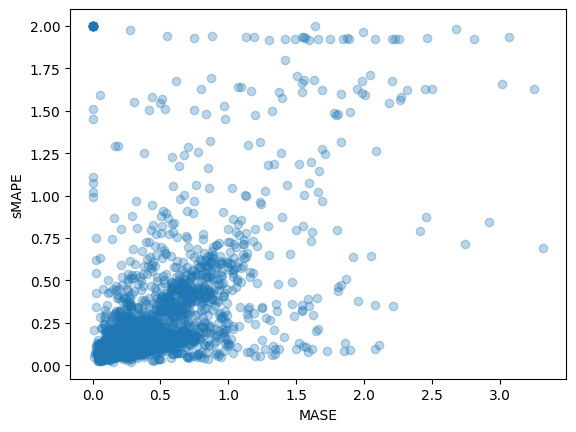

In [ ]:
plt.scatter(mase_metrics, smape_metrics, alpha=0.3)
plt.xlabel("MASE")
plt.ylabel("sMAPE")
plt.show()

In [ ]:
import matplotlib.dates as mdates

def plot(ts_index):
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=test_dataset[ts_index][FieldName.START],
        periods=len(test_dataset[ts_index][FieldName.TARGET]),
        freq=freq,
    ).to_timestamp()

    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

    ax.plot(
        index[-2*prediction_length:],
        test_dataset[ts_index]["target"][-2*prediction_length:],
        label="actual",
    )

    plt.plot(
        index[-prediction_length:],
        np.median(forecasts[ts_index], axis=0),
        label="median",
    )

    plt.fill_between(
        index[-prediction_length:],
        forecasts[ts_index].mean(0) - forecasts[ts_index].std(axis=0),
        forecasts[ts_index].mean(0) + forecasts[ts_index].std(axis=0),
        alpha=0.3,
        interpolate=True,
        label="+/- 1-std",
    )
    plt.legend()
    plt.show()


### ignore this part

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_forecast(dates, actual, forecast, title="Forecast vs Actual"):
    plt.figure(figsize=(10, 6))

    # Convert dates to a pandas DateTimeIndex
    date_index = pd.to_datetime(dates)

    plt.plot(date_index, actual, label='Actual')
    plt.plot(date_index, forecast, label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (26161,) and (100, 24)

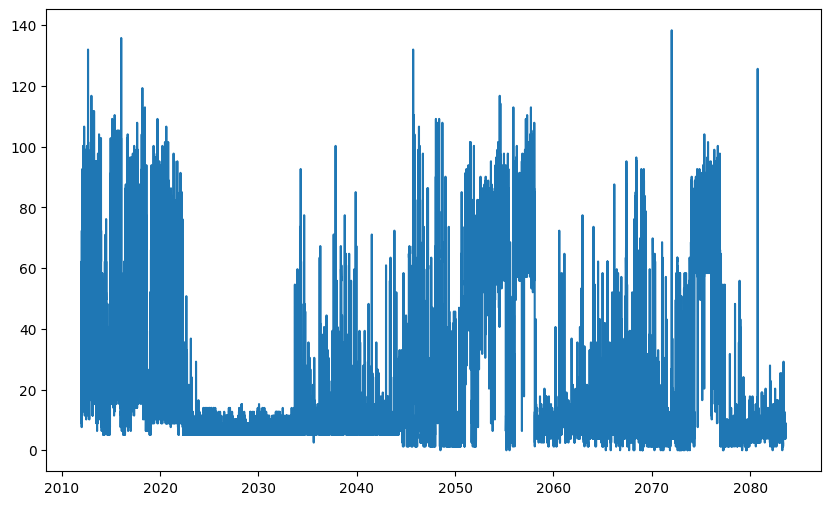

In [ ]:
import pandas as pd

# Get the start date, actual values, and forecast for the first time series
start_date = test_dataset[0]["start"].to_timestamp()
actual = test_dataset[0]["target"]
forecast = forecasts[0]

# Generate a sequence of dates from the start date
dates = pd.date_range(start_date, periods=len(actual))

# Plot the actual values and the forecast
plot_forecast(dates, actual, forecast, title="Forecast vs Actual for the first time series")

ValueError: x and y must have same first dimension, but have shapes (24,) and (1,)

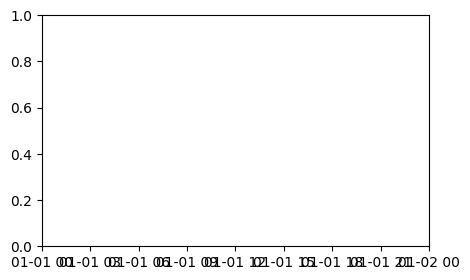

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_forecast(dates, actual, forecast, title="Forecast vs Actual"):
    plt.figure(figsize=(5, 3))  # Create a smaller image
    plt.plot(dates, actual, label='Actual')
    plt.plot(dates, forecast, label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

# Get the start date, actual values, and forecast for the first time series
start_date = test_dataset[0]["start"].to_timestamp()
actual = test_dataset[0]["target"][0]  # Select the first time series
forecast = forecasts[0][0]  # Select the first forecast

# Generate a sequence of dates from the start date
dates = pd.date_range(start_date, periods=24)

# Plot the actual values and the forecast
plot_forecast(dates, actual, forecast, "test")

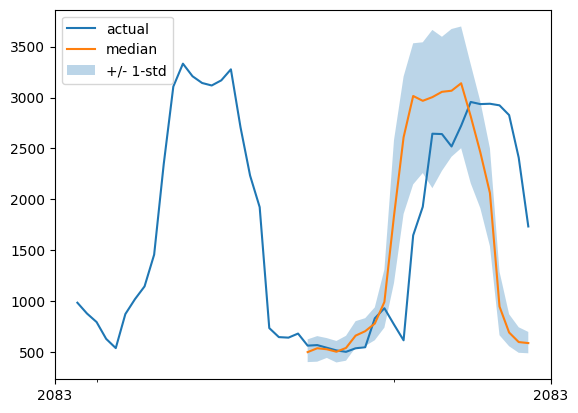

In [ ]:
plot(100)

In [ ]:
print(start_date)

2012-01-01 00:00:00


In [ ]:
def plot_forecast(actual, forecast, title="Forecast vs Actual"):
    plt.figure(figsize=(5, 3))  # Create a smaller image
    plt.plot(actual, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
# Get the actual value and forecast for the first time step
actual = test_dataset[0]["target"]
forecast = forecasts[0][0]  # Select the first forecast

# Plot the actual value and the forecast
plt.figure(figsize=(10, 6))
plt.plot([actual], label='Actual')
plt.plot([forecast], label='Forecast')
plt.title("Forecast vs Actual for the first time step")
plt.legend()
plt.show()

ValueError: Image size of 831x548483 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

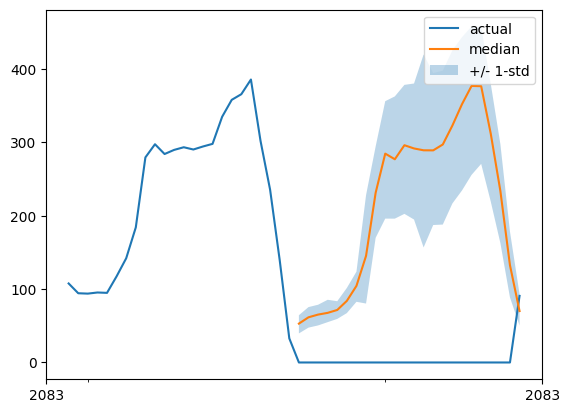

In [ ]:
## example of plotting the datetime value
plot(334)

## Using Pre-trained Transformer model linked to dataset

By scirik: https://huggingface.co/scirik/time-series-transformer-electricity-load-diagrams

In [ ]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("scirik/time-series-transformer-electricity-load-diagrams")

config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/377k [00:00<?, ?B/s]